## 5조 < 트렌드 분석을 통한 공연 기획 >
### - 공연 '기간' 트렌드 분석 ( 이혜진 ) : 수익성이 높은 공연 '기간' 선정하기

- 링크 출처 : 인터파크티켓 랭킹페이지 
- 인터파크 웹/모바일/제휴사/전화예매 (입금완료 기준)

## 예매율 TOP50  => 공연이 시작하는 월

In [233]:
from bs4 import BeautifulSoup
from selenium import webdriver
import requests

### 공연 전체 데이터

In [243]:
yearList = [2015,2016,2017,2018,2019]
monthlist = []

for year in yearList:
    url = 'http://ticket.interpark.com/contents/Ranking/RankList?pKind=P&pCate=&pType=Y&pDate='+str(year)+'0101'
    driver=webdriver.Chrome(r'C:\Users\User\PycharmProjects\EXAM_PY\chromedriver')
    driver.get(url) 

    html=driver.page_source
    soup=BeautifulSoup(html, 'html.parser')
    #print(soup.prettify())
    
    top50 = soup.find_all('div' , class_='rankingDetailBody')
    showtimes= top50[0].find_all('td', class_='prdDuration')
    
    # 공연 날짜 리스트 
    datelist = []
    for showtime in showtimes :
        info = showtime.text
        infos = info.split()
        datelist.append(infos)
        #print(infos)
  
    for date1 in datelist:
        date = date1[0].split('.')
        #print(date)
        year = int(date[0]) # 시작하는 년
        month = int(date[1]) # 시작하는 달
        monthlist.append(month)
        monthlist.sort()

#print(monthlist)

In [236]:
import pandas as pd

m = monthlist

# DataFrame 만들기
count = []
for i in range(1,13):
    count.append(m.count(i))
    
#print(count)

body = pd.DataFrame(count, range(1,13))
body.rename(columns={0:'count'})

,count
1,23
2,12
3,20
4,21
5,13
6,31
7,20
8,19
9,17
10,9


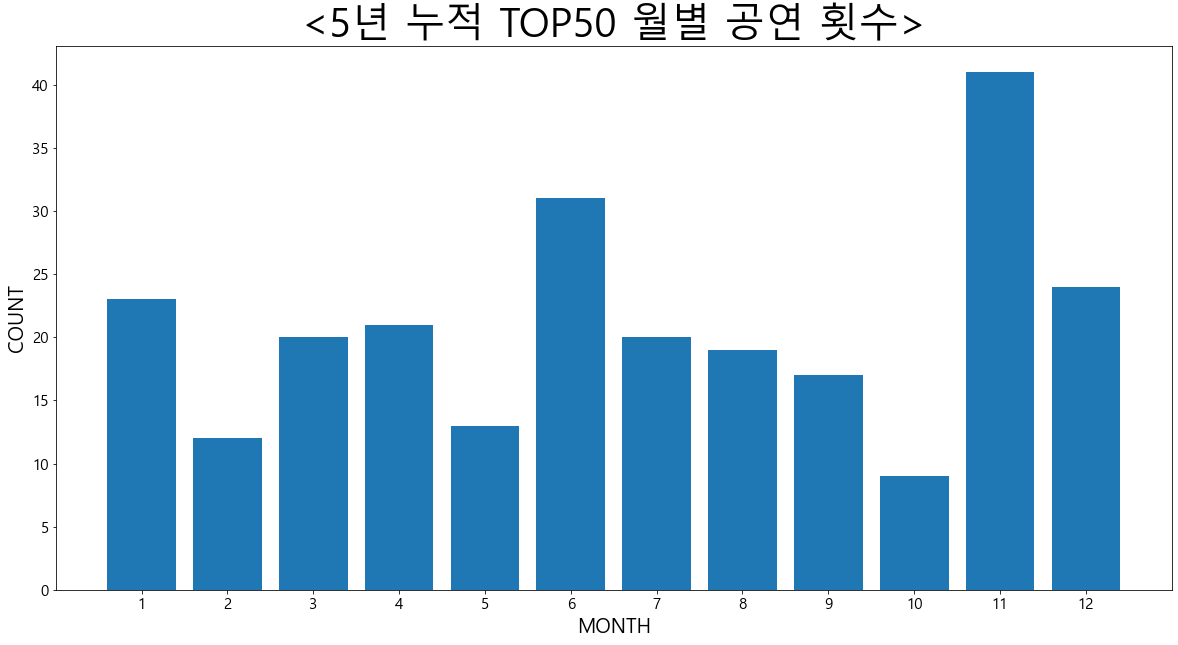

In [287]:
import matplotlib
from matplotlib import font_manager,rc  #한글 폰트 입력을 위한 라이브러리
import matplotlib.pyplot as plt   #그래프 그리기 위한 라이브러리

plt.figure(figsize=(20,10))
plt.bar(range(1,13), count)
plt.rc('font',family='Malgun Gothic')

plt.title("<5년 누적 TOP50 월별 공연 횟수>", size=40)
#plt.legend(loc = "best", fontsize = 20)
plt.xlabel('MONTH', size=20)
plt.xlim(0,13)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], size=15)
plt.yticks(size=15)
plt.ylabel('COUNT', size=20)
plt.show()

## 2021년(작년) 날씨 데이터

In [289]:
# 필요한 모듈 로딩
import pandas as pd
import csv
import matplotlib.pyplot as plt

# 파일 경로 지정

DF=pd.read_csv('weather_2021.csv', encoding='euc_kr')      
DF_w= DF.set_index('시점')
DF_w

,관측지점별,평균최고기온 (℃)
시점,,
2021.01,서울,2.2
2021.02,서울,7.9
2021.03,서울,14.8
2021.04,서울,19.5
2021.05,서울,21.9
2021.06,서울,27.6
2021.07,서울,32.2
2021.08,서울,29.7
2021.09,서울,26.9


# 결론

- 가장 예매율이 높은 TOP50 공연 중 11월 공연이 제일 많음.
- 11월(41회) > 6월(31회) > 12월(24회) > 1월(23회) 순으로 
- 겨울에는 방학, 연말, 연초인 11월 ,12월, 1월에 개최.
- 여름에는 6월 개최.

## 1안) 추천!!
- 겨울 성수기인 11,12,1월 선정
- 회전문 관객 이용(뮤지컬)
- 데이트, 가족 나들이를 실내에서

## 2안)
- 페스티벌, 콘서트를 여름 성수기인 6월 선정
- 1안과 반대로 실외에서 

## 3안)
- 비성수기(2-5월, 7-10월)에 새로운 공연 개최로 이름 알리기.